In [1]:
#!pip install itables
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import json
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('transactions.csv')
payDaatDF = pd.json_normalize(df['payment_data'].apply(json.loads))

merchantDF_temp = df[['id', 'merchant']].dropna()
merchantDF = pd.json_normalize(merchantDF_temp['merchant'].apply(json.loads))

In [3]:
def principais_estatisticas(df, type_transac):
  col_valor = 'amount'

  df_DEBIT = df[df['type'] == type_transac]
  df_DEBIT[col_valor] = df_DEBIT[col_valor].abs()
  return df_DEBIT.groupby('category')[col_valor].agg(['mean', 'median', 'std']).sort_values(by='mean', ascending=False)

In [5]:
def observar_sazonalidade(df, type_transac):
  col_date = 'date'
  col_mes = 'month'
  col_valor = 'amount'
  col_total_gastos = 'gastos_totais'

  df[col_date] = pd.to_datetime(df[col_date], errors='coerce')

  df[col_mes] = df[col_date].dt.to_period('M')

  gastos = df[df['type'].str.upper() == type_transac]

  gastos_mensais = (
      gastos.groupby(col_mes)[col_valor]
      .sum()
      .reset_index()
  )

  gastos_mensais[col_total_gastos] = gastos_mensais[col_valor].abs()
  gastos_mensais = gastos_mensais.drop(columns=[col_valor])

  plt.style.use('seaborn-v0_8-whitegrid')

  fig, ax = plt.subplots(figsize=(12, 7))

  bars = ax.bar(
      gastos_mensais[col_mes].astype(str),
      gastos_mensais[col_total_gastos],
      color='#4C72B0',
      width=0.65,
      edgecolor='black',
      linewidth=0.7,
      alpha=0.9
  )

  for bar in bars:
      height = bar.get_height()
      ax.text(
          bar.get_x() + bar.get_width() / 2,
          height + (height * 0.015),
          f"R$ {height:,.2f}",
          ha='center',
          va='bottom',
          fontsize=10.5,
          fontweight='bold',
          color='#333333'
      )

  ax.set_title('💸 Sazonalidade dos Gastos Mensais (Tipo: DEBIT)',
              fontsize=18, fontweight='bold', pad=20, color='#222222')
  ax.set_xlabel('Mês/Ano', fontsize=12, labelpad=10)
  ax.set_ylabel('Gastos Totais (R$)', fontsize=12, labelpad=10)
  ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('R$ {x:,.0f}'))

  ax.grid(True, linestyle='--', linewidth=0.7, alpha=0.6, which='both', axis='both')
  plt.xticks(rotation=45, fontsize=11)
  plt.yticks(fontsize=11)

  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  plt.tight_layout()
  plt.show()

In [6]:
principais_estatisticas(df, 'DEBIT')

,mean,median,std
category,,,
Aluguel de veículos,2845.040000,2845.040,3710.571119
Livraria,1630.855000,1630.855,2243.586177
Hospedagem,1276.770000,1276.770,NaN
Dentista,1218.790000,1218.790,NaN
Transferência mesma titularidade,964.814937,250.000,2667.964383
Universidade,858.560000,858.560,NaN
Vestiário,566.437500,586.925,434.151574
Transferência mesma titularidade - Dinheiro,403.333333,150.000,518.684233
Transferência para terceiros - PIX,350.000000,300.000,165.831240


In [7]:
principais_estatisticas(df, 'CREDIT')

,mean,median,std
category,,,
Transferência - Câmbio,2098.890000,1000.00,2471.380512
Transferência - PIX,1112.802222,500.00,2554.177378
Transferência para terceiros - PIX,444.950000,444.95,445.547983
Delivery de alimentos,306.750000,306.75,375.827254
Transferência mesma titularidade,237.023208,142.97,349.027939
Transferência - TED,96.620000,96.62,70.399551
Transferência - Dinheiro,50.000000,50.00,NaN
Táxi e transporte privado urbano,43.150000,43.15,0.735391
Juros de rendimentos de dividendos,0.010000,0.01,0.000000


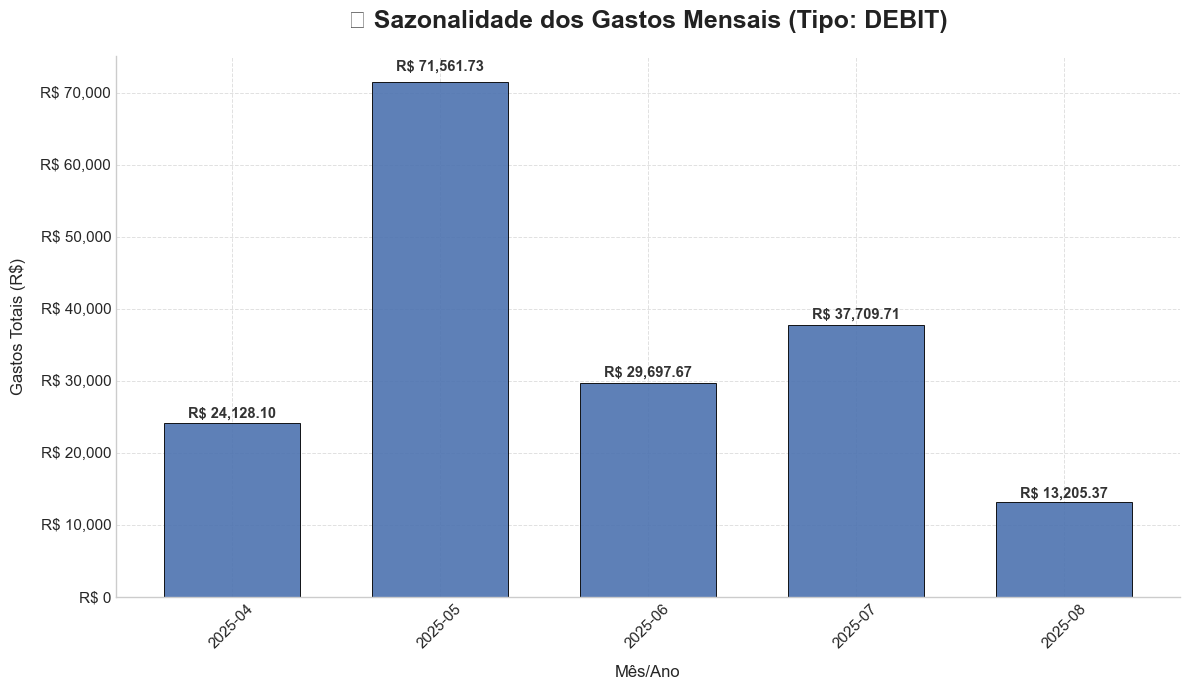

In [8]:
observar_sazonalidade(df, 'DEBIT')

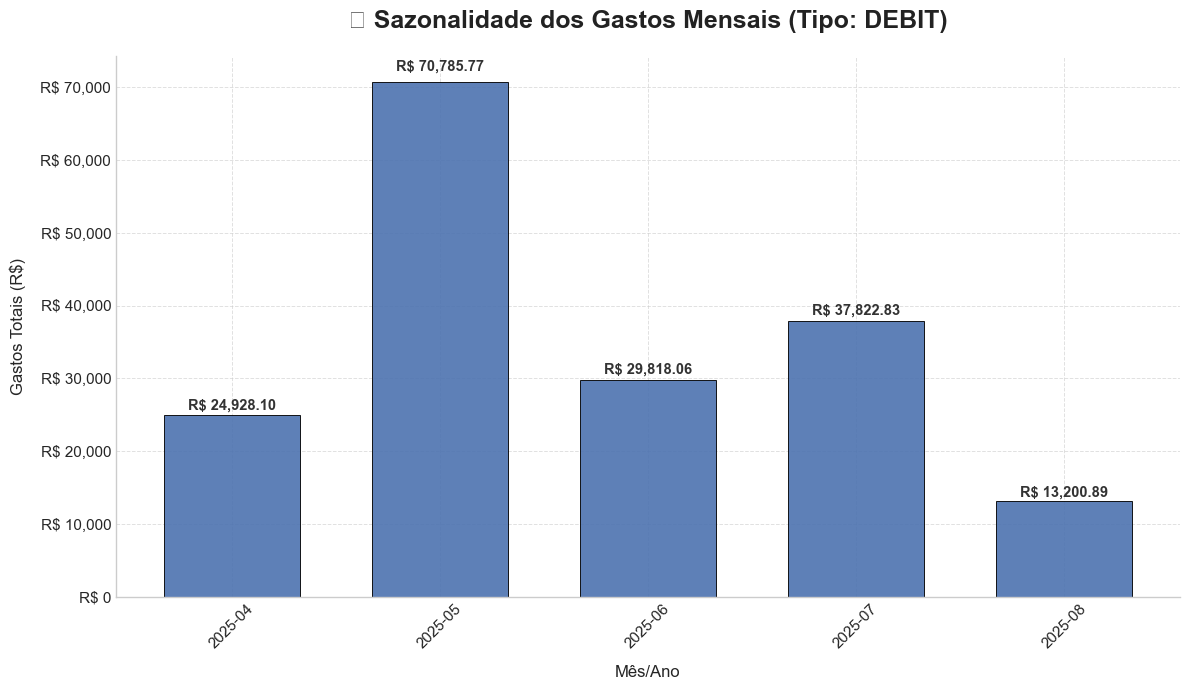

In [9]:
observar_sazonalidade(df, 'CREDIT')